In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/Yashit/Downloads/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Generate summary statistics (mean, median, std, etc.).

# Summary statistics
summary_stats = df.describe()
print(summary_stats)
# Additional summary stats
print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Mode:\n", df.mode(numeric_only=True).iloc[0])
print("Standard Deviation:\n", df.std(numeric_only=True))
print("Variance:\n", df.var(numeric_only=True))
print("Range:\n", df.max(numeric_only=True) - df.min(numeric_only=True))
print("Skewness:\n", df.skew(numeric_only=True))
print("Kurtosis:\n", df.kurtosis(numeric_only=True))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Mean:
 PassengerId    446.000000
Survived         0.383838
Pclass           2.308

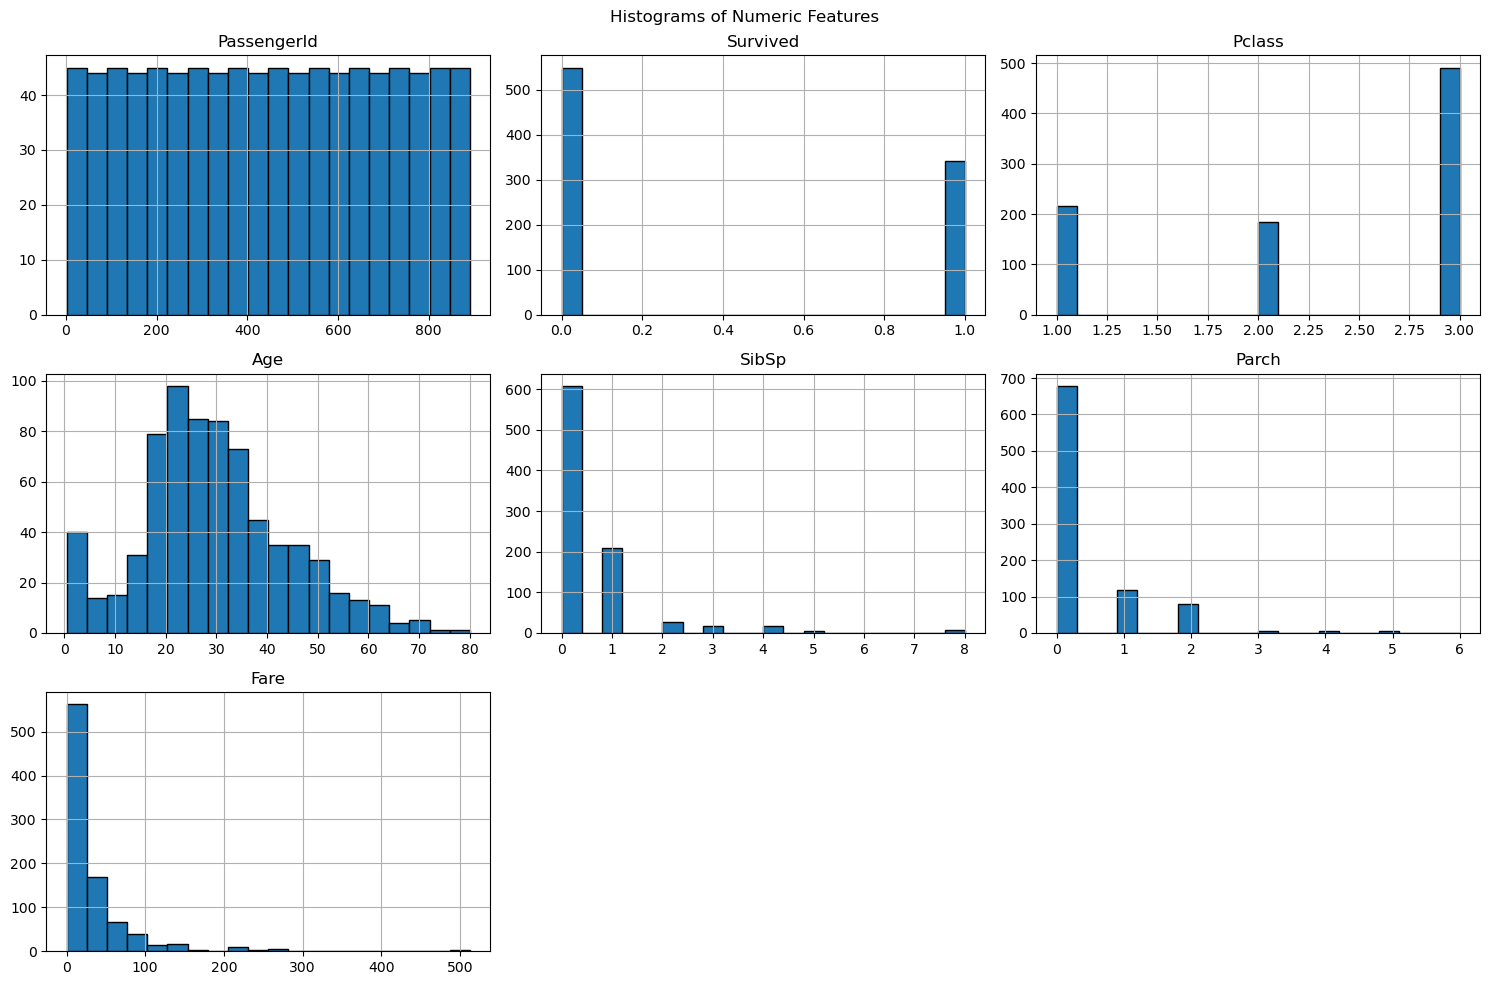

In [7]:
#Create histograms and boxplots for numeric features.

numeric_cols = df.select_dtypes(include='number').columns
# Plot histograms
df[numeric_cols].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

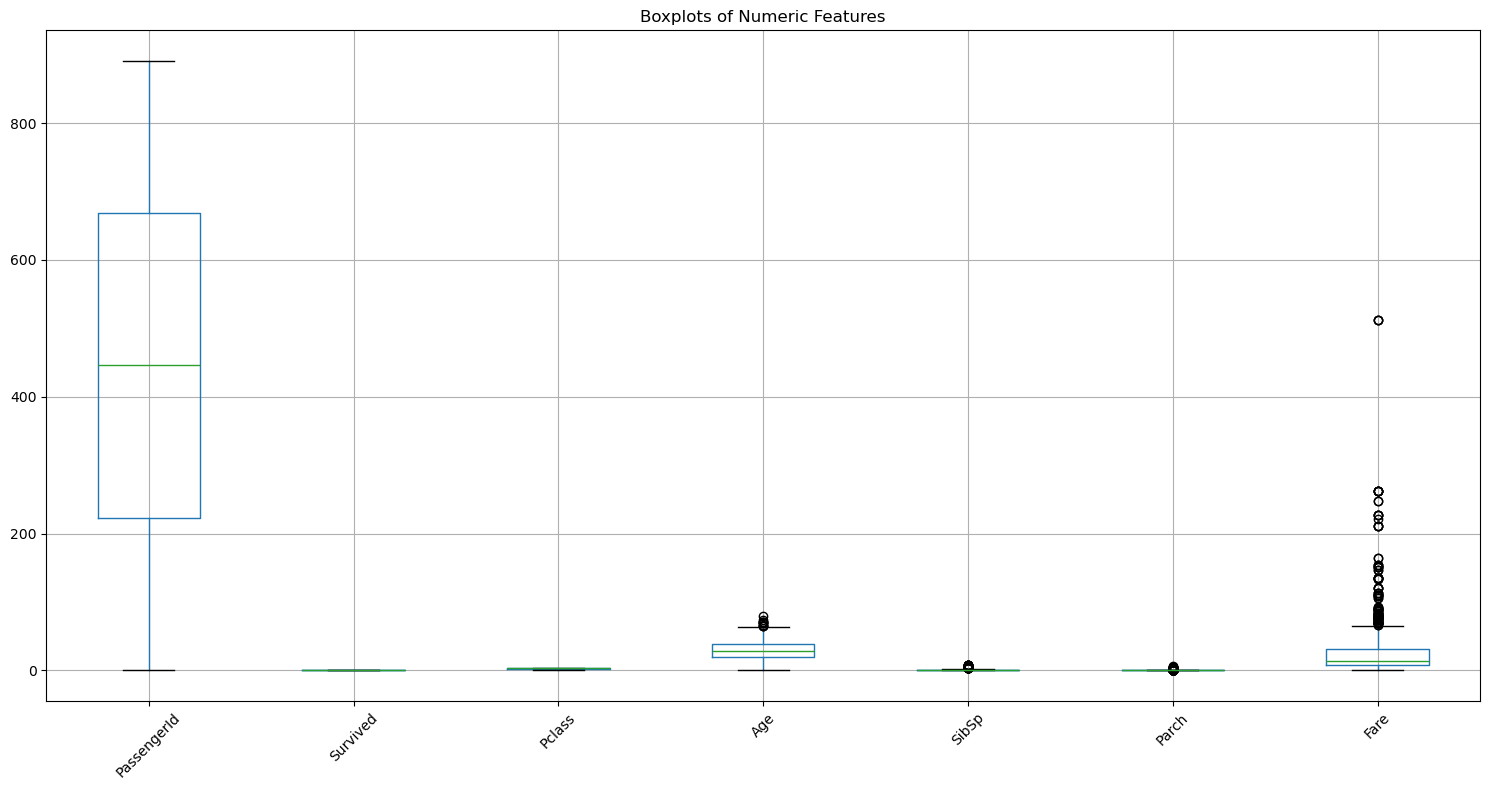

In [9]:
# Plot boxplots
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
#Use pairplot/correlation matrix for feature relationships.

numeric_cols = df.select_dtypes(include='number').columns
df_numeric = df[numeric_cols]

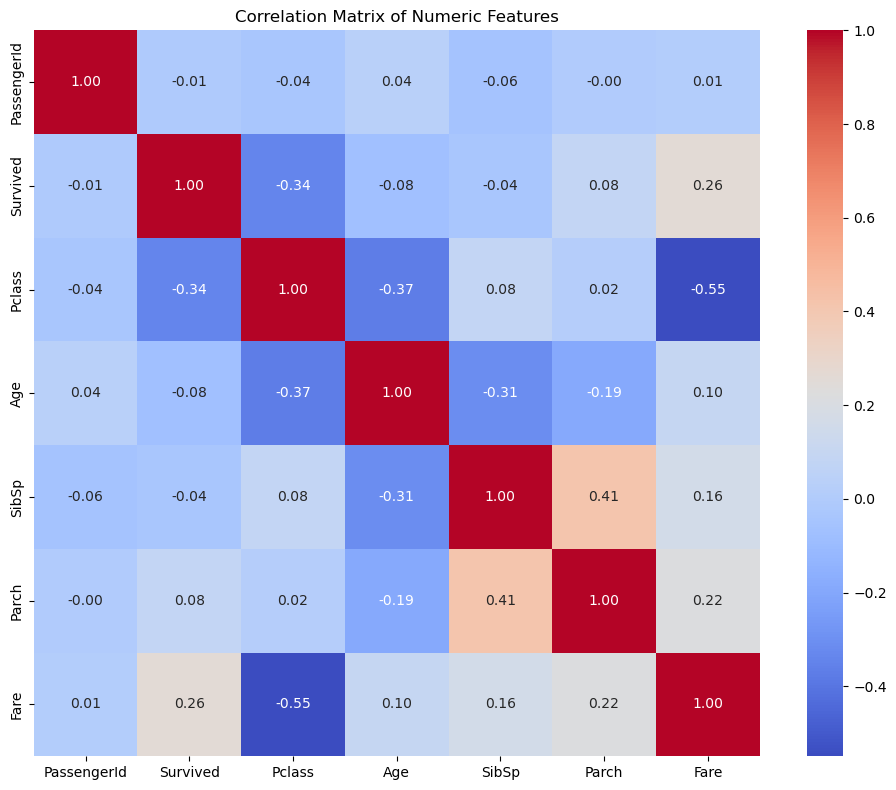

In [30]:
plt.figure(figsize=(10, 8))
corr_matrix = df_numeric.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

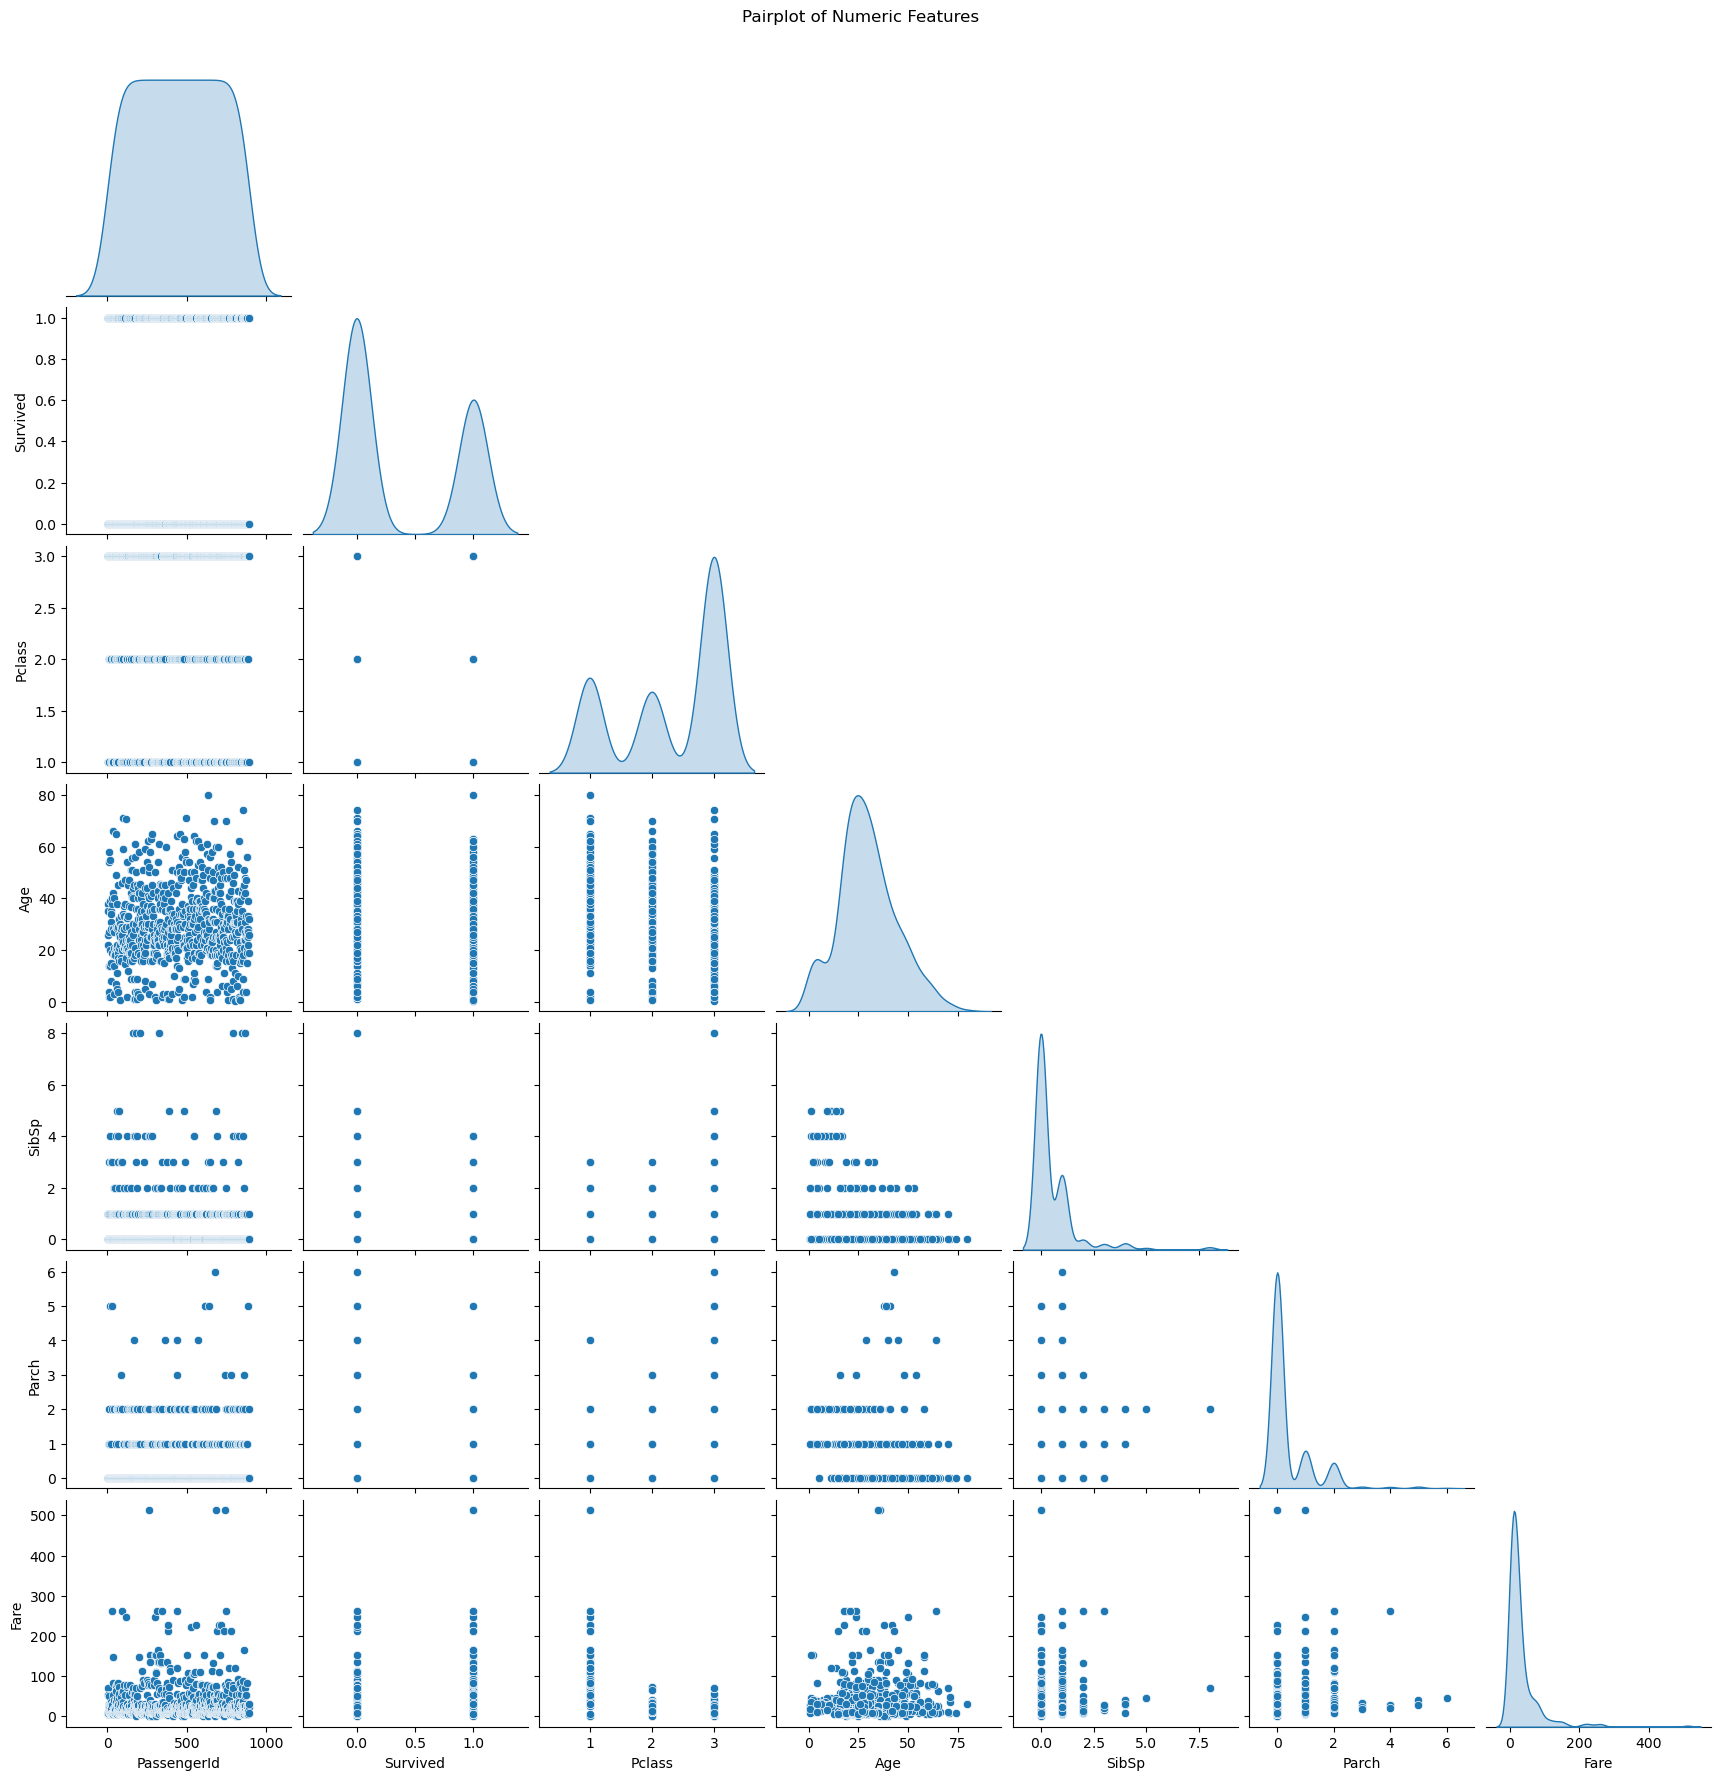

In [32]:
# If too many columns, pick top 5 most correlated with a target (optional)
# target_col = 'your_target_column'
# top_corr_cols = corr_matrix[target_col].abs().sort_values(ascending=False).head(6).index
# df_pair = df[top_corr_cols]

# Else use all numeric columns
sns.pairplot(df_numeric, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

In [34]:
print(df.isnull().sum())          # Count of missing values
print((df == float('inf')).sum())  # Infinite values (optional)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


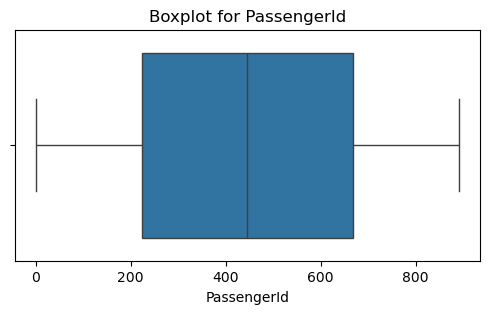

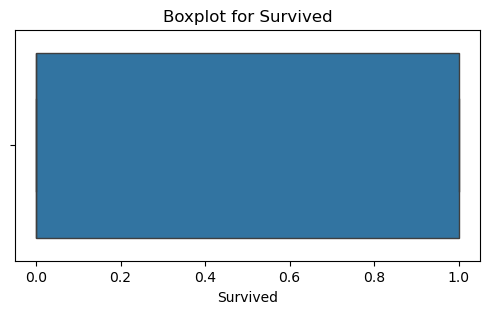

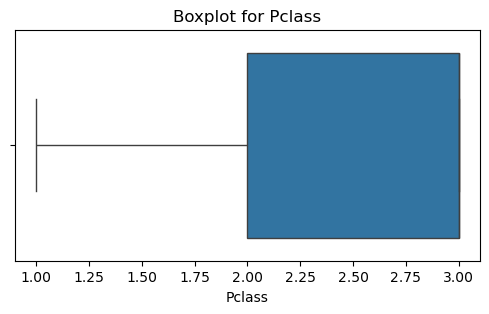

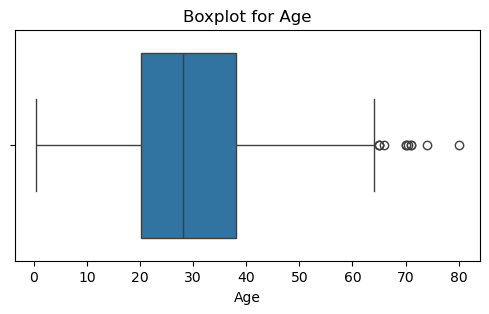

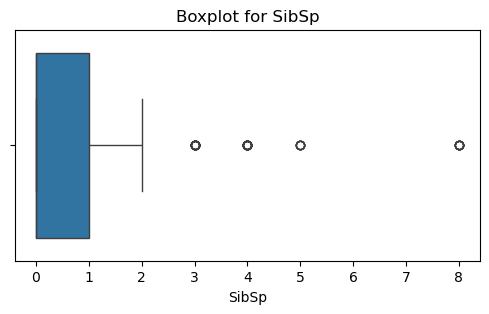

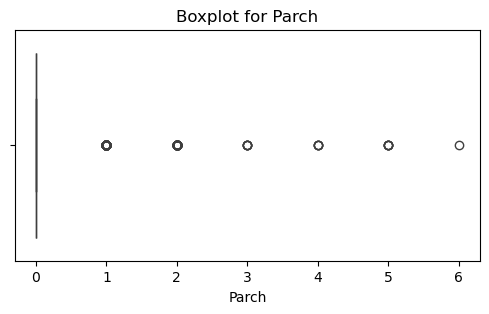

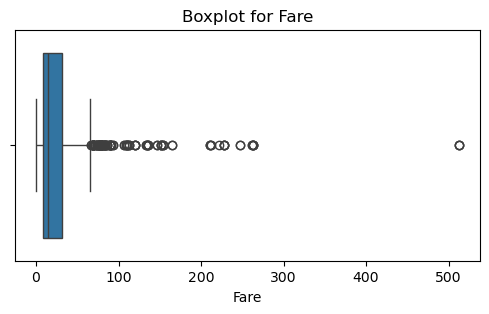

In [41]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

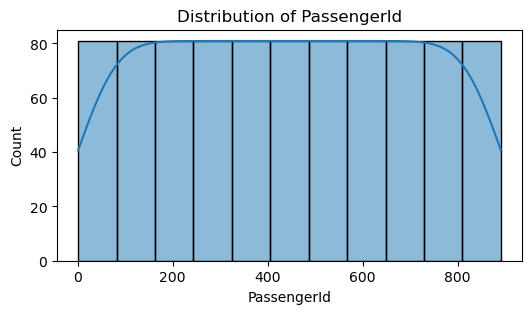

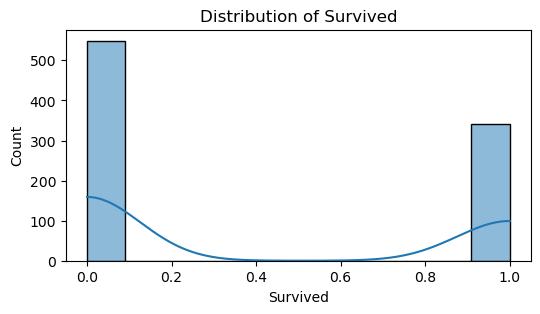

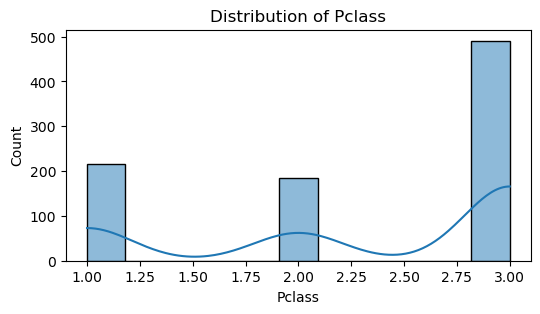

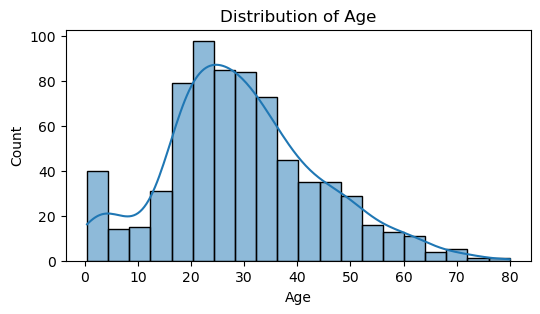

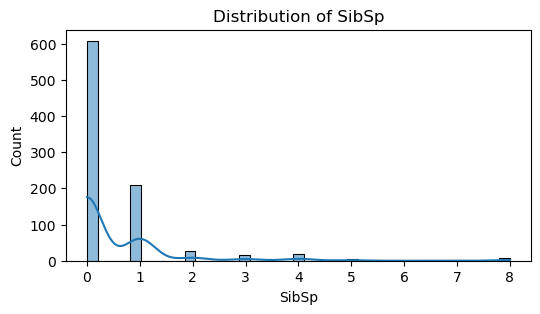

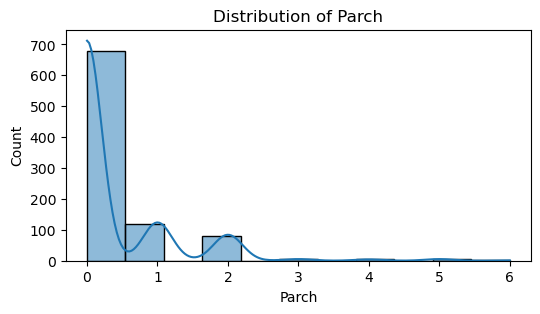

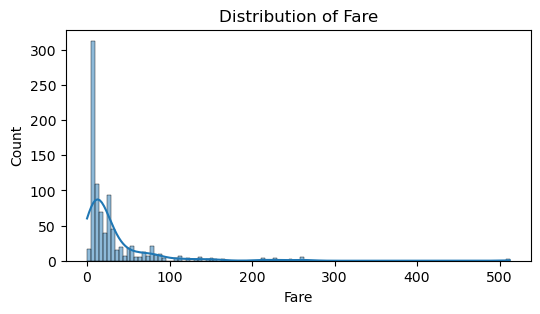

In [43]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

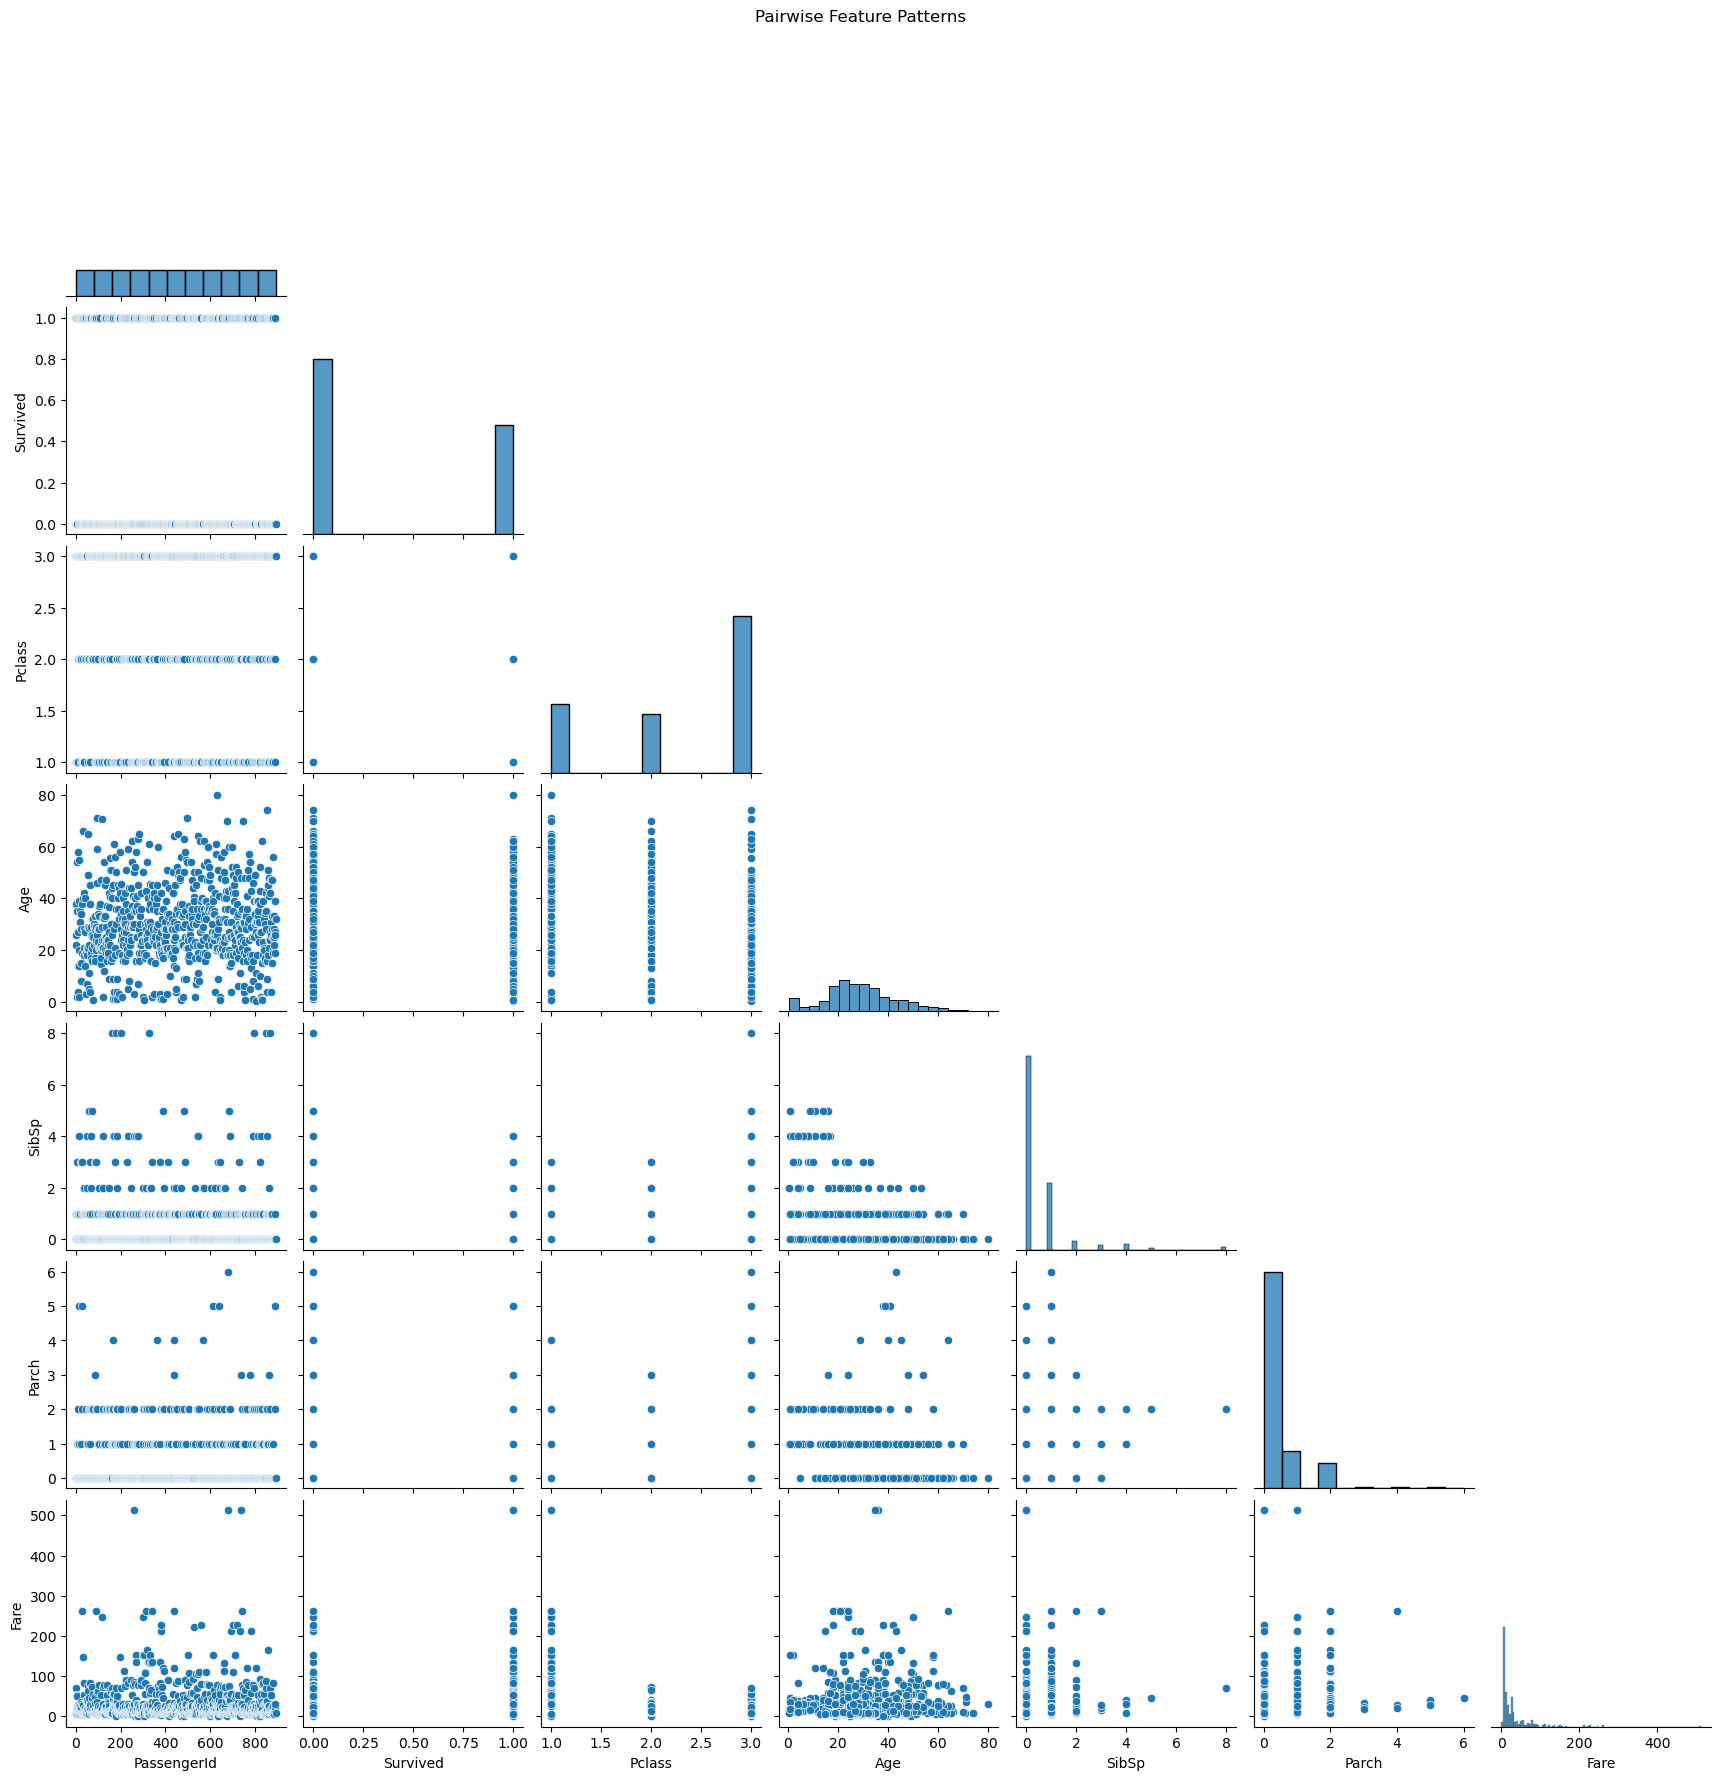

In [46]:
sns.pairplot(df[numeric_cols], corner=True)
plt.suptitle("Pairwise Feature Patterns", y=1.02)
plt.show()

In [48]:
# Summary stats
summary = df_numeric.describe().T
summary["skewness"] = df_numeric.skew()
summary["missing"] = df_numeric.isnull().sum()
print(summary)

             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  skewness  missing  
PassengerId  891.0000  0.000000        0  
Survived       1.0000  0.478523        0  
Pclass         3.0000 -0.630548        0  
Age           80.0000  0.389108      177  
SibSp          8.0000  3.695352        0  
Parch          6.0000  2.749117        0  
Fare         512.3292  4.787317        0  
